In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn, index_col="index")
data.head()

,crypto,time,open,high,low,close,volume,trade
index,,,,,,,,
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)
ethereum_df.head()

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [5]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df.head()

,time,open,high,low,close,volume,trade
0,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [6]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df.head()

,time,open,high,low,close,volume,trade
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [7]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df.head()

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [8]:
ethereum_df.dtypes

open      object
high      object
low       object
close     object
volume    object
trade     object
dtype: object

In [9]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float})
ethereum_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
trade     float64
dtype: object

In [10]:
# set the close price 14 day prior as another feature
projection = 14
ethereum_df["close(t-14)"] = ethereum_df["close"].shift(projection).astype(float)
ethereum_df.tail(15)

,open,high,low,close,volume,trade,close(t-14)
time,,,,,,,
2021-11-15,4626.50,4772.01,4540.00,4563.78,375421.6601,193844.8631,4319.43
2021-11-16,4563.77,4563.77,4103.00,4209.76,735857.0630,354749.4963,4589.89
2021-11-17,4209.59,4299.91,4063.48,4287.80,472852.1842,230168.3863,4603.35
2021-11-18,4288.07,4344.81,3956.44,3996.90,576945.1837,271503.5573,4532.32
2021-11-19,3996.90,4308.97,3973.01,4294.76,420045.0897,220791.4006,4474.24
2021-11-20,4294.75,4435.88,4199.86,4412.17,365584.5780,184875.7626,4518.00
2021-11-21,4412.17,4451.00,4242.41,4258.31,340206.3203,163875.6246,4612.59
2021-11-22,4259.70,4320.00,4022.74,4085.97,518501.3338,252693.2206,4807.98
2021-11-23,4086.28,4385.59,4059.62,4339.44,502811.7902,257182.2577,4732.33


In [11]:
# insert column with the difference between 14 days ago and today
ethereum_df["14 day diff"] = ethereum_df["close"] - ethereum_df["close(t-14)"]
ethereum_df.head(30)

,open,high,low,close,volume,trade,close(t-14),14 day diff
time,,,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377,NaN,NaN
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012,NaN,NaN
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922,NaN,NaN
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141,NaN,NaN
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293,NaN,NaN
2017-12-04,460.30,470.98,445.00,466.67,23182.65949,11708.14715,NaN,NaN
2017-12-05,466.66,468.67,445.21,452.26,25387.11695,12902.22244,NaN,NaN
2017-12-06,452.26,455.10,400.00,411.01,38638.76036,16000.21644,NaN,NaN
2017-12-07,413.50,427.61,375.01,406.33,41343.73269,17174.99356,NaN,NaN


In [12]:
ethereum_df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
trade           0
close(t-14)    14
14 day diff    14
dtype: int64

In [13]:
#remove nan rows
ethereum_df= ethereum_df.dropna()
ethereum_df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
trade          0
close(t-14)    0
14 day diff    0
dtype: int64

In [14]:
# Set our X features data by dropping our target
X = ethereum_df.drop("close", axis=1)
X

,open,high,low,volume,trade,close(t-14),14 day diff
time,,,,,,,
2017-12-13,622.00,705.69,539.93,57694.18773,28508.57887,421.70,262.29
2017-12-14,683.98,747.60,630.50,60919.26902,30685.47276,427.43,252.33
2017-12-15,679.76,689.00,594.60,39778.16165,17125.09695,457.51,217.44
2017-12-16,673.75,712.00,669.22,26866.05330,12518.18939,457.63,225.18
2017-12-17,681.80,728.00,680.33,31398.44760,16831.51917,460.30,247.34
...,...,...,...,...,...,...,...
2021-11-25,4270.10,4550.00,4248.27,445868.24340,231824.31930,4719.00,-194.15
2021-11-26,4524.48,4551.00,3913.00,720245.16120,348872.86610,4665.46,-624.26
2021-11-27,4041.20,4183.66,4028.34,275326.52020,136157.34820,4644.28,-548.99


In [15]:
# Set y target
y = ethereum_df["close"]
y

time
2017-12-13     683.99
2017-12-14     679.76
2017-12-15     674.95
2017-12-16     682.81
2017-12-17     707.64
               ...   
2021-11-25    4524.85
2021-11-26    4041.20
2021-11-27    4095.29
2021-11-28    4294.78
2021-11-29    4444.53
Name: close, Length: 1448, dtype: float64

LR: 1.000000 (0.000000)
Lasso: 0.900865 (0.063463)
Ridge: 0.376576 (0.534137)
RF: 0.249705 (1.040092)
XGBOOST: 0.238771 (1.050988)
NN: 0.996231 (0.003578)
KNN: -7.557442 (7.185893)
SVR: -12.103923 (14.053634)


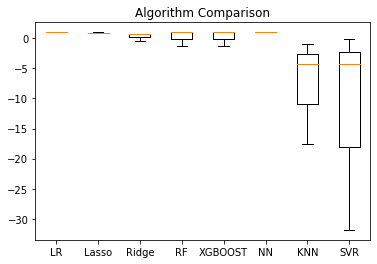

In [16]:
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [17]:
# We need to set our training and testing data.
# We want all of the data except the last 30 days to train on, and we will test on the last 30 days, 


#remove last 30 days we want to keep as test data and drop our label which is the prediction column
X_train = ethereum_df[:-30].drop("close",axis=1)
print(X_train)


y_train = ethereum_df[:-30]
y_train = y_train["close"]
y_train

               open     high      low        volume         trade  \
time                                                                
2017-12-13   622.00   705.69   539.93   57694.18773   28508.57887   
2017-12-14   683.98   747.60   630.50   60919.26902   30685.47276   
2017-12-15   679.76   689.00   594.60   39778.16165   17125.09695   
2017-12-16   673.75   712.00   669.22   26866.05330   12518.18939   
2017-12-17   681.80   728.00   680.33   31398.44760   16831.51917   
...             ...      ...      ...           ...           ...   
2021-10-26  4220.36  4297.00  4090.21  414498.15990  205853.06890   
2021-10-27  4131.52  4307.00  3909.00  704604.25000  342946.25220   
2021-10-28  3921.99  4295.00  3890.17  626378.50550  331721.67970   
2021-10-29  4286.01  4460.47  4265.97  559231.07691  299827.57771   
2021-10-30  4418.89  4434.06  4232.20  340223.06900  164985.54250   

            close(t-14)  14 day diff  
time                                  
2017-12-13       421.70 

time
2017-12-13     683.99
2017-12-14     679.76
2017-12-15     674.95
2017-12-16     682.81
2017-12-17     707.64
               ...   
2021-10-26    4131.52
2021-10-27    3922.00
2021-10-28    4286.02
2021-10-29    4418.89
2021-10-30    4322.68
Name: close, Length: 1418, dtype: float64

In [18]:
# Our testing set will be the last 30 days of the data.
# Just the last 30 days
X_test = ethereum_df[-30:].drop("close", axis=1)
print(X_test)

y_test = ethereum_df[-30:]
y_test = y_test["close"]
y_test

               open     high      low        volume         trade  \
time                                                                
2021-10-31  4322.68  4399.14  4164.35  412856.28930  207029.19300   
2021-11-01  4287.48  4386.58  4146.30  417620.70730  208433.93650   
2021-11-02  4319.43  4599.60  4284.43  468184.79301  245450.71120   
2021-11-03  4589.68  4665.87  4455.00  448658.35125  221693.79026   
2021-11-04  4603.35  4606.65  4420.08  368218.25695  180789.48190   
2021-11-05  4532.31  4570.05  4438.80  305651.72440  152155.85650   
2021-11-06  4474.24  4530.00  4326.17  322154.09730  162175.62780   
2021-11-07  4518.00  4637.98  4502.37  243596.59520  124167.19250   
2021-11-08  4612.59  4822.97  4612.00  391102.31806  202324.49531   
2021-11-09  4807.98  4838.28  4713.89  311267.57998  147968.47588   
2021-11-10  4732.33  4868.00  4461.93  553596.99163  270065.18221   
2021-11-11  4628.68  4779.00  4576.47  303688.97650  157894.35770   
2021-11-12  4719.00  4809.71  4507

time
2021-10-31    4287.21
2021-11-01    4319.43
2021-11-02    4589.89
2021-11-03    4603.35
2021-11-04    4532.32
2021-11-05    4474.24
2021-11-06    4518.00
2021-11-07    4612.59
2021-11-08    4807.98
2021-11-09    4732.33
2021-11-10    4628.78
2021-11-11    4719.00
2021-11-12    4665.46
2021-11-13    4644.28
2021-11-14    4626.50
2021-11-15    4563.78
2021-11-16    4209.76
2021-11-17    4287.80
2021-11-18    3996.90
2021-11-19    4294.76
2021-11-20    4412.17
2021-11-21    4258.31
2021-11-22    4085.97
2021-11-23    4339.44
2021-11-24    4269.36
2021-11-25    4524.85
2021-11-26    4041.20
2021-11-27    4095.29
2021-11-28    4294.78
2021-11-29    4444.53
Name: close, dtype: float64

In [19]:
model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print("R2 Score",model.score(X_test,y_test))

R2 Score 1.0


In [20]:
predictions = model.predict(X_test)
data = pd.DataFrame()
data["actual"] = y_test
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-10-31,4287.21,4287.21,4.547474e-12,1.060707e-13
2021-11-01,4319.43,4319.43,4.547474e-12,1.052795e-13
2021-11-02,4589.89,4589.89,4.547474e-12,9.907587e-14
2021-11-03,4603.35,4603.35,4.547474e-12,9.878618e-14
2021-11-04,4532.32,4532.32,4.547474e-12,1.003343e-13
2021-11-05,4474.24,4474.24,4.547474e-12,1.016368e-13
2021-11-06,4518.00,4518.00,4.547474e-12,1.006524e-13
2021-11-07,4612.59,4612.59,4.547474e-12,9.858829e-14
2021-11-08,4807.98,4807.98,5.456968e-12,1.134981e-13


In [21]:
print(data["difference (%)"].mean())

1.0679701209402618e-13


In [22]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

4.729372449219227e-12

<AxesSubplot:xlabel='time'>

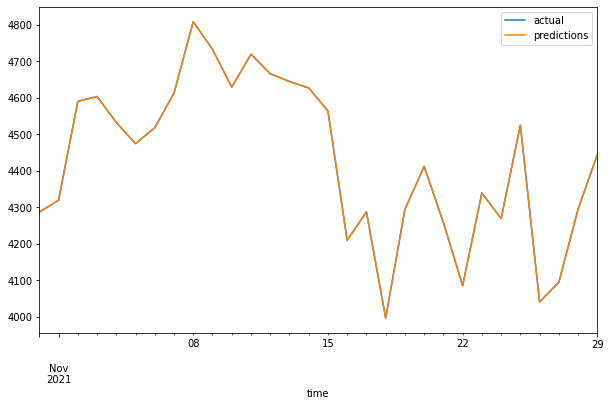

In [23]:
#plot chart
data.plot(y=["actual", "predictions"], figsize=(10,6))

In [24]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = X_train.columns.tolist()
data

,scores,features
0,2.782968e-16,open
1,5.675897e-16,high
2,4.121804e-16,low
3,2.550103e-19,volume
4,-2.342251e-19,trade
5,1.000000e+00,close(t-14)
6,1.000000e+00,14 day diff


<AxesSubplot:xlabel='features'>

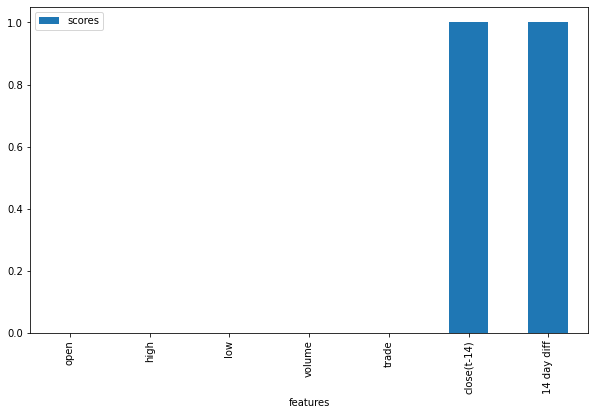

In [25]:
data.plot(kind="bar", x="features", y="scores", figsize=(10,6))

In [26]:
# test for overfitting.
from sklearn.metrics import mean_absolute_error, r2_score
pred_train = model.predict(X_train)
r2_score(y_train, pred_train)

1.0

In [27]:
pred_test = model.predict(X_test)
r2_score(y_test, pred_test)

1.0

Same score on Train set and Test set. Model is not overfitting.

In [28]:
# import pickle
# pickle.dump(model, open("best_model.pkl", "wb"))

# import pickle
# loaded_model= pickle.load(open("best_model.pkl", "rb"))

# loaded_model.predict(X_test)